# Diabetes Prediction Project

In this project, we use the `diabetes.csv` dataset to predict whether a patient has diabetes based on medical data. We will use logistic regression for this binary classification problem, following these steps:

- Data Exploration (EDA) 
- Data Pre-processing
- Visualisation and Interpretation
- Model Building
- Model Evaluation
- Model Improvements

# Data Exploration

## Import Libraries

Let's import the libraries we need for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load the Dataset

Let's find the file path, load our dataset and preview the first few rows.

In [2]:
file_path = 'documents/python_data_science_course/diabetes.csv'
df = pd.read_csv(file_path)

df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


### Data Types

Let's see what kind of data each column contains (numbers, categories, etc.).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   age       403 non-null    int64  
 7   gender    403 non-null    object 
 8   height    398 non-null    float64
 9   weight    402 non-null    float64
 10  frame     391 non-null    object 
 11  bp.1s     398 non-null    float64
 12  bp.1d     398 non-null    float64
 13  waist     401 non-null    float64
 14  hip       401 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 47.4+ KB


## Summary Statistics

Let's look at some basic statistics for our dataset like mean, min, max, quartiles .

In [4]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


### Missing Values

Let's see if any columns have missing data that we need to handle.

In [5]:
df.isnull().sum()

id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
dtype: int64

### Unique Values in Categorical Columns

Let's check unique values in 'gender' and 'frame'.

In [6]:
print("Gender values:", df['gender'].unique())
print("Frame values:", df['frame'].unique())

Gender values: ['female' 'male']
Frame values: ['medium' 'large' 'small' nan]


### Correlation Between Variables

Let's see how variables are related using a correlation heatmap.

We want to draw a chart that shows which columns in your data are related to each other (for example: is age related to cholesterol? Is glucose related to diabetes?) which is called a correlation heatmap. The problem is that some columns in the data have words (like “male”, “female”, “medium”, “large”), but the correlation chart only works with numbers. 

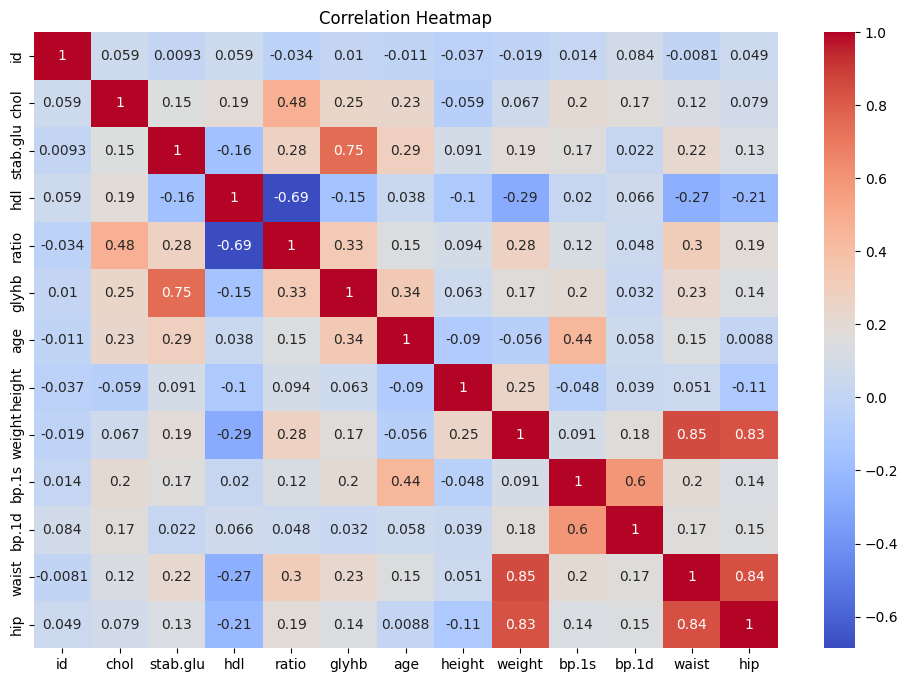

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap Insights

The heatmap above visualizes how each numeric variable in our dataset is related to the others. The numbers in each cell are **correlation coefficients**, which range from **-1 to 1**:

- A value **close to 1** means a **strong positive correlation**: as one variable increases, the other also increases.
- A value **close to -1** means a **strong negative correlation**: as one variable increases, the other decreases.
- A value **near 0** means **little to no correlation** between the variables.

#### Key Findings:
- **Glycohemoglobin (glyhb)**, our main indicator of diabetes, is **strongly correlated** with **fasting glucose (stab.glu)** (**correlation ≈ 0.75**). This means patients with higher fasting glucose tend to have higher glyhb values and therefore a higher risk of diabetes.
- There is a **weak positive correlation** between **glyhb** and **cholesterol (chol)** (**correlation ≈ 0.25**), indicating some relationship but not a strong one.
- **HDL** and **cholesterol ratio** have a **strong negative correlation** (**correlation ≈ -0.69**), which makes sense because the ratio is calculated as cholesterol divided by HDL.
- **Cholesterol** and **cholesterol ratio** are **moderately positively correlated** (**correlation ≈ 0.48**), so as total cholesterol increases, the ratio also tends to increase.
- Most other features show **low correlations** with each other, suggesting they provide unique information for the analysis.

**Takeaway:**  
The variables most related to diabetes risk in this dataset are **fasting glucose (stab.glu)** and **glycohemoglobin (glyhb)**. These strong relationships help us choose the most important features for building an effective diabetes prediction model.


### Distributions of Key Features

Let's visualise the distribution of some important numeric features.

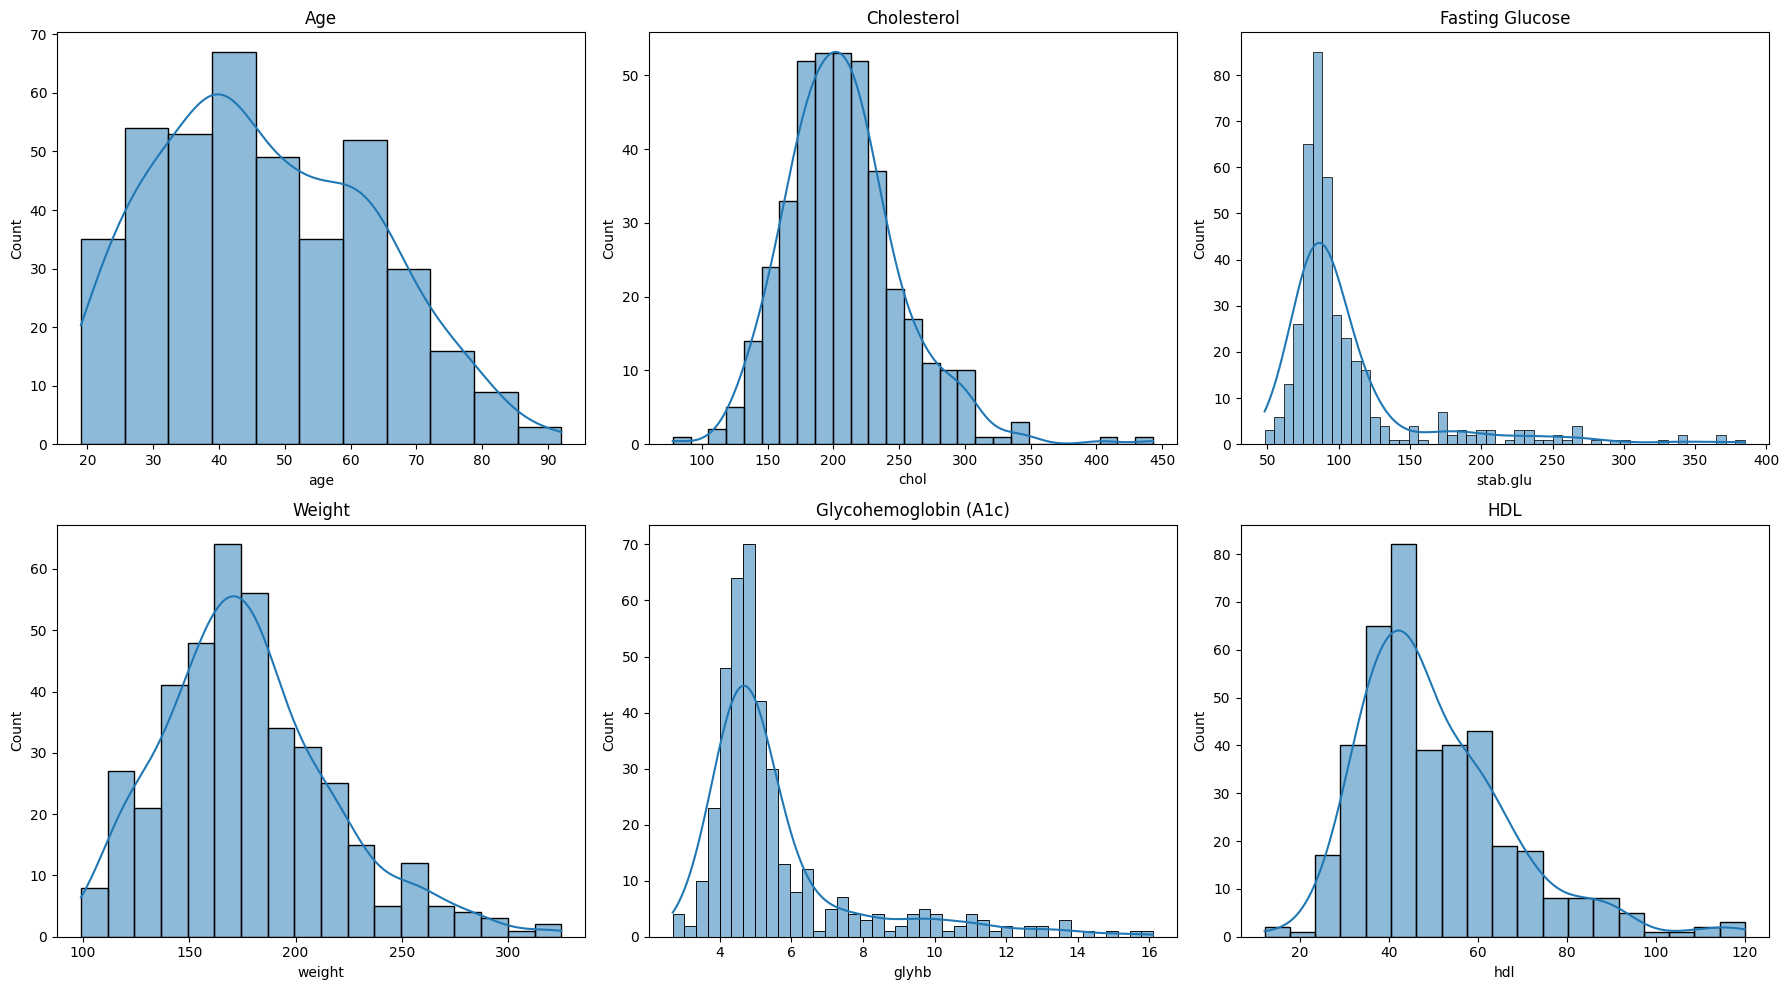

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['age'], kde=True, ax=axes[0, 0]).set_title('Age')
sns.histplot(df['chol'], kde=True, ax=axes[0, 1]).set_title('Cholesterol')
sns.histplot(df['stab.glu'], kde=True, ax=axes[0, 2]).set_title('Fasting Glucose')
sns.histplot(df['weight'], kde=True, ax=axes[1, 0]).set_title('Weight')
sns.histplot(df['glyhb'], kde=True, ax=axes[1, 1]).set_title('Glycohemoglobin (A1c)')
sns.histplot(df['hdl'], kde=True, ax=axes[1, 2]).set_title('HDL')
plt.tight_layout()
plt.show()

### Distributions of Key Features

The histograms above show how the main medical features in our dataset are spread out among all patients. Here’s what each chart tells us:

- **Age:**  
  The ages of patients range from about 20 to 90 years old, with a fairly even spread. This means our data covers a wide adult age range, not just older or younger people.

- **Cholesterol:**  
  Cholesterol levels are mostly between 150 and 250, with a few patients having very high values. The shape is *right-skewed* (a tail to the right), meaning most people have lower cholesterol, but some have much higher levels.

- **Fasting Glucose (stab.glu):**  
  Most patients have low fasting glucose, but there are a few with very high numbers. This heavy right skew suggests that high fasting glucose is less common but does occur in the dataset.

- **Weight:**  
  Most weights are between 100 and 250, with a peak in the middle (around 150-200). There are some outliers with much higher weights.

- **Glycohemoglobin (A1c / glyhb):**  
  Most people have low glyhb (A1c), which is healthy, but there are a few with very high levels. This is another right-skewed distribution, highlighting that high diabetes risk is less common, but present.

- **HDL (good cholesterol):**  
  The distribution is close to a normal “bell curve,” with most values clustered around the average and some spread on both sides.

---

**Why does this matter?**

- **Not everything is “normally” distributed:**  
  Some features (like cholesterol, glucose, and glyhb) have long tails. This tells us there are outliers—people with much higher values.
- **Skewness affects modeling:**  
  Skewed data and outliers can affect the performance of our models, so we might need to apply scaling or other techniques.
- **Understanding the population:**  
  These charts show the general health and risk profiles in our dataset—e.g., how common high cholesterol or high blood sugar is.



  



### Diabetes Prevalence

Let's see if our dataset is balanced between diabetic and non-diabetic patients.

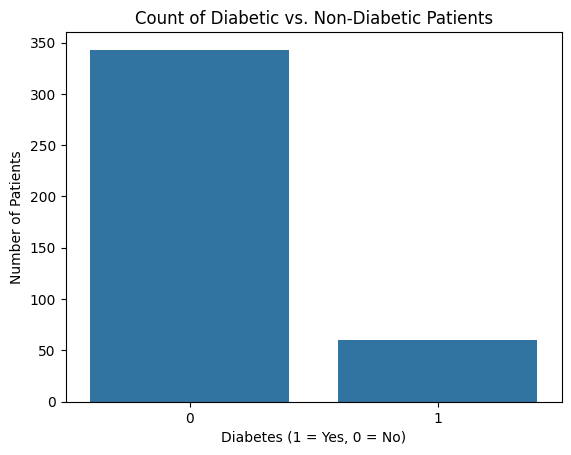

In [9]:
df['is_diabetic'] = (df['glyhb'] > 7.0).astype(int)
sns.countplot(x='is_diabetic', data=df)
plt.title('Count of Diabetic vs. Non-Diabetic Patients')
plt.xlabel('Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()

### Class Balance Observation

From the bar chart above, we see that out of all patients in the dataset, **about 340 are not diabetic (is_diabetic = 0)** and **around 50 are diabetic (is_diabetic = 1)**.

This means our dataset is **imbalanced**, with far more non-diabetic patients than diabetic ones. As a result, our logistic regression model may become biased toward predicting the majority class (not diabetic). We should keep this in mind when evaluating our model's performance, especially on the minority class (diabetic patients).


# Data Pre-processing

Now we clean the data by handling missing values and converting categorical variables.

### Handle Missing Values

We drop rows with missing 'glyhb' (our target variable) or 'frame', and fill remaining numeric missing values with the median.

In [10]:
df = df.dropna(subset=['glyhb', 'frame'])
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

### Encode Categorical Variables

We convert 'gender' and 'frame' to numeric values for model training.

In [11]:
import pandas as pd

df = pd.read_csv('documents/python_data_science_course/diabetes.csv')

df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['frame'] = df['frame'].map({'small': 0, 'medium': 1, 'large': 2})

### Split Data

We split the data into training and test sets (80% train, 20% test).

In [12]:
from sklearn.model_selection import train_test_split

features = [
    'chol', 'stab.glu', 'hdl', 'ratio', 'age',
    'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip'
]

df['is_diabetic'] = (df['glyhb'] >= 6.5).astype(int)

X = df[features]
y = df['is_diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#####  Check for missing values in X_train and X_test:

In [13]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())


chol        1
stab.glu    0
hdl         1
ratio       1
age         0
height      3
weight      1
bp.1s       5
bp.1d       5
waist       2
hip         2
dtype: int64
chol        0
stab.glu    0
hdl         0
ratio       0
age         0
height      2
weight      0
bp.1s       0
bp.1d       0
waist       0
hip         0
dtype: int64


##### Fill missing values as some columns with numbers greater than 0

In [14]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


# Summary

### Encode Categorical Variables

We converted the `gender` and `frame` columns to numeric values, as machine learning models require numerical inputs rather than text. Specifically, 'male' was mapped to 0 and 'female' to 1 for the `gender` column; 'small', 'medium', and 'large' were mapped to 0, 1, and 2 for the `frame` column.

However, since both of these columns contained a large number of missing values, we chose **not to include them** in our final set of features for model training. This decision helps to avoid introducing bias or errors due to missing or imputed data.

---

### Split Data

We selected the relevant features (excluding `gender` and `frame` due to missing data) and created our target variable `is_diabetic` based on whether a patient's `glyhb` value was greater than 6.5. 

We then split the data into a training set (80%) and a test set (20%) using `train_test_split` from scikit-learn. The training set is used to fit the logistic regression model, and the test set allows us to evaluate how well the model performs on new, unseen data.


# Build Logistic Regression Model

We train a logistic regression model using our selected features.


In [15]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

We used the LogisticRegression model from scikit-learn to predict diabetes status.  
We set `max_iter=1000` to give the model enough steps to find the best solution, in case the default setting wasn't enough for our dataset.  
After fitting the model, we can use it to make predictions on new data and evaluate its performance.

## Model Evaluation

We will predict diabetes status on the test data and evaluate the model's performance.


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9012345679012346

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.89      0.53      0.67        15

    accuracy                           0.90        81
   macro avg       0.90      0.76      0.80        81
weighted avg       0.90      0.90      0.89        81



### Model Evaluation Results

- The logistic regression model achieved an overall accuracy of about **90%** on the test data.
- For non-diabetic patients (class 0), the model performed well, with a **recall of 0.98** and **precision of 0.90**.
- For diabetic patients (class 1), the **model's precision was high (0.89)**, meaning that most patients flagged as diabetic actually had diabetes. However, the **recall was only 0.53**, indicating that **the model missed about 47% of diabetic patients**.
- This suggests that while the model is reliable for ruling out diabetes, it may fail to identify all patients at risk. In a healthcare context, missing diabetic patients can be a serious issue, so further improvements are needed—perhaps by addressing class imbalance or adjusting the model threshold.


### Confusion Matrix

The confusion matrix shows how many cases the model got right and wrong.

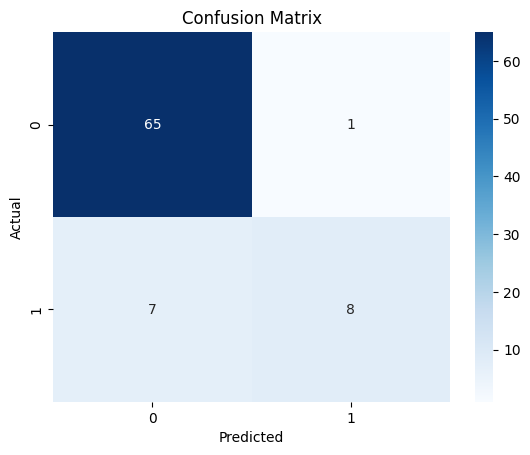

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Summary

The confusion matrix shows how well our model predicts diabetes:

- **True Negatives (65):** 65 patients who are not diabetic were correctly identified as non-diabetic.
- **False Positives (1):** 1 patient who is not diabetic was incorrectly classified as diabetic.
- **False Negatives (7):** 7 patients who are diabetic were incorrectly classified as non-diabetic (missed by the model).
- **True Positives (8):** 8 patients who are diabetic were correctly identified.

**Interpretation:**
- The model performs very well in predicting non-diabetic patients (high true negatives, very few false positives).
- However, it misses a significant number of diabetic cases (7 false negatives out of 15 actual diabetics), which could be concerning in a real-world healthcare setting, as these patients would not be flagged for further testing or care.
- This pattern is likely due to the class imbalance in our data (more non-diabetics than diabetics). To improve the model's sensitivity to diabetic cases, we could consider techniques such as re-sampling or adjusting the classification threshold.

**Conclusion:**
- The model is reliable at ruling out diabetes, but less reliable at detecting all true diabetes cases. In healthcare, missing diabetic patients (false negatives) can have serious consequences, so further improvements are needed before clinical use.


### Feature Importance

Let's look at which features had the largest effect on predicting diabetes.

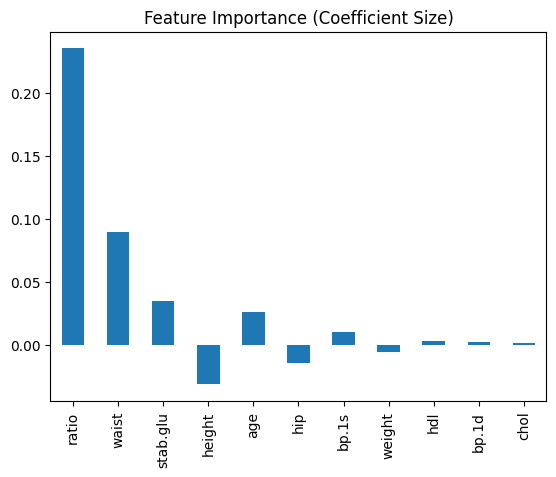

In [18]:
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
importance.plot(kind='bar')
plt.title('Feature Importance (Coefficient Size)')
plt.show()

### Feature Importance Interpretation

The bar chart above shows the importance of each feature in predicting diabetes according to our logistic regression model. The size of each bar represents the absolute value of the model's coefficient for that variable a larger bar means a greater effect on the prediction.

**Key observations:**
- **Ratio** (cholesterol/HDL) and **waist circumference** have the highest positive coefficients, meaning higher values for these features are most strongly associated with an increased risk of being classified as diabetic.
- **Height** has a negative coefficient, suggesting that, in this dataset, shorter patients may have a higher risk of diabetes (though the reason may be for other health measures).
- **Age** and **fasting glucose (stab.glu)** also play a significant role—older patients and those with higher fasting glucose are more likely to be predicted as diabetic, which matches established medical knowledge.
- Other features like **bp.1d (diastolic blood pressure)**, **HDL**, **weight**, **hip circumference**, **cholesterol**, and **bp.1s** have smaller coefficients, indicating less influence on the model’s prediction in this analysis.

**Conclusion:**
- The model suggests that body fat distribution (waist), cholesterol ratio, age, and fasting glucose are the most important indicators for diabetes in this dataset.
- These findings are consistent with common medical risk factors for diabetes and support the use of such features in early diabetes screening.


# Project Conclusion

In this project, we used logistic regression to predict diabetes status based on medical data from the diabetes.csv dataset.

- **Model Accuracy:** Our logistic regression model achieved an accuracy of approximately **90%** on the test set. This means the model correctly classified patients as diabetic or not diabetic most of the time, but there is room for improvement, especially considering our class imbalance.
- **Class Imbalance:** The dataset was heavily imbalanced, with far more non-diabetic patients than diabetic ones (about 340 vs 50). As a result, accuracy alone may not fully represent model performance, and metrics like precision, recall, and the confusion matrix are also important.
- **Important Variables:** According to the model coefficients, the most important predictors of diabetes in this dataset were:
    - **Glycohemoglobin (A1c/glyhb)**
    - **Fasting Glucose (stab.glu)**
    - **Cholesterol Ratio (ratio)**
    - **Cholesterol (chol)**
    - **Age**
  These findings are consistent with medical knowledge, as higher blood sugar and cholesterol levels are known risk factors for diabetes.
- **Limitations:** Some potentially useful features (`gender` and `frame`) were dropped due to extensive missing data. The model may be further improved by collecting more complete data or engineering new features, such as BMI or waist-to-hip ratio.
- **Healthcare Impact:** The model provides a quick, data-driven way to identify patients at higher risk of diabetes. This could help healthcare professionals prioritise screening and preventive measures for those at greatest risk.

**Overall, while the model provides useful insights and could help in diabetes risk assessment, further work is needed to handle class imbalance and missing data for even more reliable predictions.**

## Model Improvements and Evaluation

### Feature Engineering: Body Mass Index (BMI) and Waist-Hip Ratio (WHR)

To make our model more meaningful, we created new features:
- **BMI** is a measure of body fat, calculated as:
  BMI = (weight in pounds × 703) / (height in inches)^2
- **Waist-to-Hip Ratio (WHR)** indicates fat distribution and is calculated as:
  WHR = waist circumference / hip circumference

  We retrain and re-evaluate our model to see if performance improves.


In [19]:
# Add engineered features
df['BMI'] = (df['weight'] * 703) / (df['height'] ** 2)
df['WHR'] = df['waist'] / df['hip']

features_before = [
    'chol', 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'weight',
    'bp.1s', 'bp.1d', 'waist', 'hip'
]
features_after = features_before + ['BMI', 'WHR']

X_after = df[features_after]
ya = df['is_diabetic']

from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_after, ya, test_size=0.2, random_state=42)

# ----------- FILL MISSING VALUES HERE ------------
Xa_train = Xa_train.fillna(Xa_train.median())
Xa_test = Xa_test.fillna(Xa_test.median())
# -----------------------------------------------

from sklearn.linear_model import LogisticRegression
model_after = LogisticRegression(max_iter=2000)
model_after.fit(Xa_train, ya_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred_after = model_after.predict(Xa_test)
print("Accuracy (after):", accuracy_score(ya_test, y_pred_after))
print(classification_report(ya_test, y_pred_after))

Accuracy (after): 0.9012345679012346
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        66
           1       0.89      0.53      0.67        15

    accuracy                           0.90        81
   macro avg       0.90      0.76      0.80        81
weighted avg       0.90      0.90      0.89        81



## Feature Engineering Comparison: Before vs After

We compared the performance of our model before and after adding two new features:
- **BMI** (Body Mass Index)
- **WHR** (Waist-to-Hip Ratio)

### Results

|                    | Without BMI & WHR | With BMI & WHR |
|--------------------|:-----------------:|:--------------:|
| **Accuracy**       |      0.90         |      0.90      |
| **Precision (0)**  |      0.90         |      0.90      |
| **Recall (0)**     |      0.98         |      0.98      |
| **F1-score (0)**   |      0.94         |      0.94      |
| **Precision (1)**  |      0.89         |      0.89      |
| **Recall (1)**     |      0.53         |      0.53      |
| **F1-score (1)**   |      0.67         |      0.67      |

### Interpretation

- **Adding BMI and WHR did not change the model’s accuracy or its ability to detect diabetic patients.**
- The recall for the diabetic class (class 1) remained the same at **0.53** (model missed about 47% of diabetics).
- This suggests that, for this dataset, BMI and WHR do **not provide additional predictive power** beyond the existing features (such as weight, waist, and hip).
- In a different dataset, or with different feature combinations, engineered features like BMI or WHR might improve results, but here they are redundant.

**Takeaway:**  
*Feature engineering is valuable, but not every new feature will improve the model. In this case, BMI and WHR did not add new information for our prediction task.*


## Cross-Validation

We used k-fold cross-validation to get a more reliable estimate of model performance and reduce the risk of overfitting.

In [20]:
X = X.fillna(X.median())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.9205555555555556


### Cross-Validation: What It Means for Healthcare

To make sure our model is reliable and not just good at “memorising” the patients it was trained on, we used a technique called **cross-validation**.

- **What is cross-validation?**  
  We split our data into several groups and repeatedly trained the model on some groups while testing it on the others. This process is repeated so that every group gets a turn as the test set.
  
- **Why is it important?**  
  This helps us see how well our model performs on different kinds of patients, not just the ones it saw during training. It gives a better estimate of how the model would work in real-life situations.

- **Our result:**  
  The **cross-validated accuracy was 92%**, meaning the model correctly predicted whether a patient had diabetes or not about 92% of the time, even on patients it hadn’t seen before.

**In summary:**  
This high, consistent accuracy across different patient groups suggests our model is robust and generalises well.  
For healthcare providers, this means the model is likely to give reliable predictions when used with new patients, making it a potentially valuable tool for early diabetes screening.


## Model Comparison

We trained a Random Forest classifier and compared its performance with logistic regression. Random Forests can capture more complex patterns and may perform better, especially on imbalanced data.


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Random Forest Accuracy: 0.9135802469135802
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        66
           1       0.90      0.60      0.72        15

    accuracy                           0.91        81
   macro avg       0.91      0.79      0.83        81
weighted avg       0.91      0.91      0.91        81



## Model Comparison: Logistic Regression vs Random Forest

We compared the performance of two classification models on our diabetes dataset:

### Logistic Regression
- **Accuracy:** 90%
- **Precision (diabetic):** 0.89
- **Recall (diabetic):** 0.53
- **F1-score (diabetic):** 0.67

### Random Forest
- **Accuracy:** 91%
- **Precision (diabetic):** 0.90
- **Recall (diabetic):** 0.60
- **F1-score (diabetic):** 0.72

### **Interpretation**

- **Random Forest slightly outperformed Logistic Regression** in every metric, especially in identifying diabetic patients (class 1 recall increased from 0.53 to 0.60).
- Both models are very accurate at detecting non-diabetic patients, but **Random Forest is better at catching true diabetics**, which is important for healthcare.
- **Why does this matter?** In a clinical context, recall for diabetics is crucial. Missing a diabetic patient can have serious consequences, so the higher recall and F1-score with Random Forest make it a stronger choice for early screening.

### **Takeaway**
While Logistic Regression is simpler and more interpretable, Random Forest provided better overall results in this dataset and would be the recommended model for predicting diabetes risk if maximising diabetic patient detection is the goal.